## Informasi Mahasiswa

Nama: Marlina

NPM : 2108107010009

## Jenis Dataset
Dataset dari kaggle https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction/data

### Deskripsi Dataset:
Dataset ini merupakan kumpulan data yang menampilkan berbagai faktor yang mempengaruhi harga ponsel, seperti resolusi, merek, ukuran, berat, kualitas gambar, RAM, baterai, dan kekuatan CPU. Tujuan dari dataset ini adalah untuk memperkirakan harga ponsel berdasarkan fitur-fitur yang disebutkan di atas.

### Informasi Atribut:
- **Product_id**: Merupakan identifikasi unik untuk setiap produk.
- **Price**: Merupakan harga produk dalam satuan tertentu (mungkin dalam mata uang tertentu).
- **Sale**: Mungkin merupakan penjualan atau jumlah penjualan produk tersebut.
- **weight**: Merupakan berat produk, umumnya dalam satuan tertentu (misalnya gram).
- **resolution**: Merupakan resolusi layar produk.
- **ppi**: Pixels Per Inch (PPI) merupakan ukuran kepadatan piksel layar, yang dapat mempengaruhi kualitas tampilan.
- **cpu core**: Jumlah inti (core) pada prosesor.
- **cpu freq**: Frekuensi prosesor dalam satuan tertentu (mungkin GHz).
- **internal mem**: Merupakan ukuran memori internal produk dalam satuan tertentu (misalnya GB).
- **ram**: Merupakan ukuran memori RAM produk dalam satuan tertentu (misalnya GB).
- **RearCam**: Resolusi kamera belakang produk.
- **Front_Cam**: Resolusi kamera depan produk.
- **battery**: Kapasitas baterai produk dalam satuan tertentu (misalnya mAh).
- **thickness**: Ketebalan produk dalam satuan tertentu (misalnya cm).

### Studi Kasus regresi

Studi kasus dataset ini adalah membangun model SVR untuk memprediksi harga produk berdasarkan fitur-fiturnya. Misalnya, kita ingin memprediksi harga produk berdasarkan resolusi layar, kepadatan piksel (PPI), jumlah inti prosesor, ukuran memori internal, dan lain-lain.

## Import Libary dan Baca dataset

In [77]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Baca dataset
df = pd.read_csv("dataset/Cellphone.csv")
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


## Preprocessing Data

In [79]:
# informasi umum kolom pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [80]:
# cek apakah ada missing value pada dataset
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [81]:
# cek apakah ada duplikat data pada dataset
df.duplicated().sum()

0

In [82]:
df.drop('Product_id', inplace = True, axis = 1)

In [83]:
# informasi statistik dari dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,161.0,2215.596273,768.187171,614.0,1734.0,2258.00,2744.000,4361.0
Sale,161.0,621.465839,1546.618517,10.0,37.0,106.00,382.000,9807.0
weight,161.0,170.426087,92.888612,66.0,134.1,153.00,170.000,753.0
resoloution,161.0,5.209938,1.509953,1.4,4.8,5.15,5.500,12.2
ppi,161.0,335.055901,134.826659,121.0,233.0,294.00,428.000,806.0
cpu core,161.0,4.857143,2.444016,0.0,4.0,4.00,8.000,8.0
cpu freq,161.0,1.502832,0.599783,0.0,1.2,1.40,1.875,2.7
internal mem,161.0,24.501714,28.804773,0.0,8.0,16.00,32.000,128.0
ram,161.0,2.204994,1.609831,0.0,1.0,2.00,3.000,6.0
RearCam,161.0,10.378261,6.181585,0.0,5.0,12.00,16.000,23.0


In [84]:
# dataset setelah di drop kolom No dan Transaction_Date
df.head(5)

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


<Axes: >

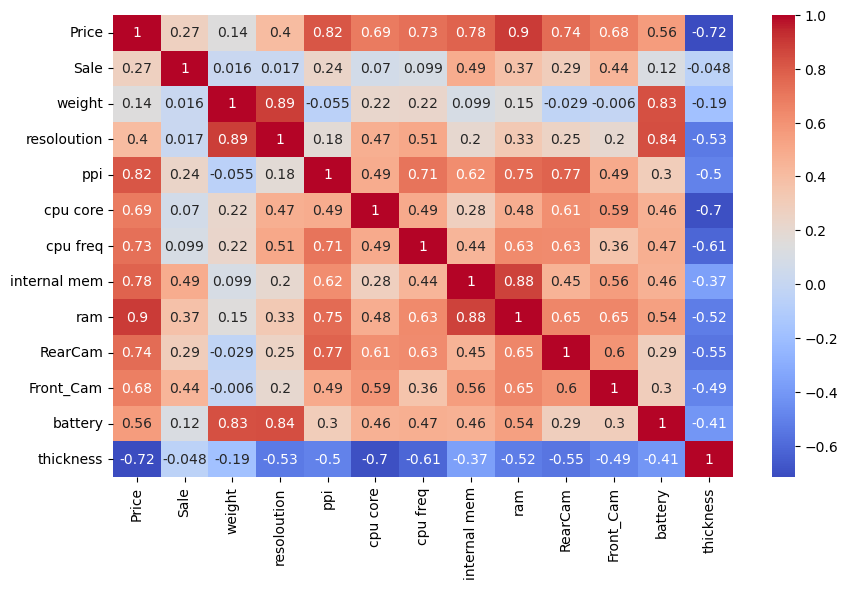

In [85]:
# korelasi antar kolom pada dataset
df_cor = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(df_cor, annot=True, cmap='coolwarm')

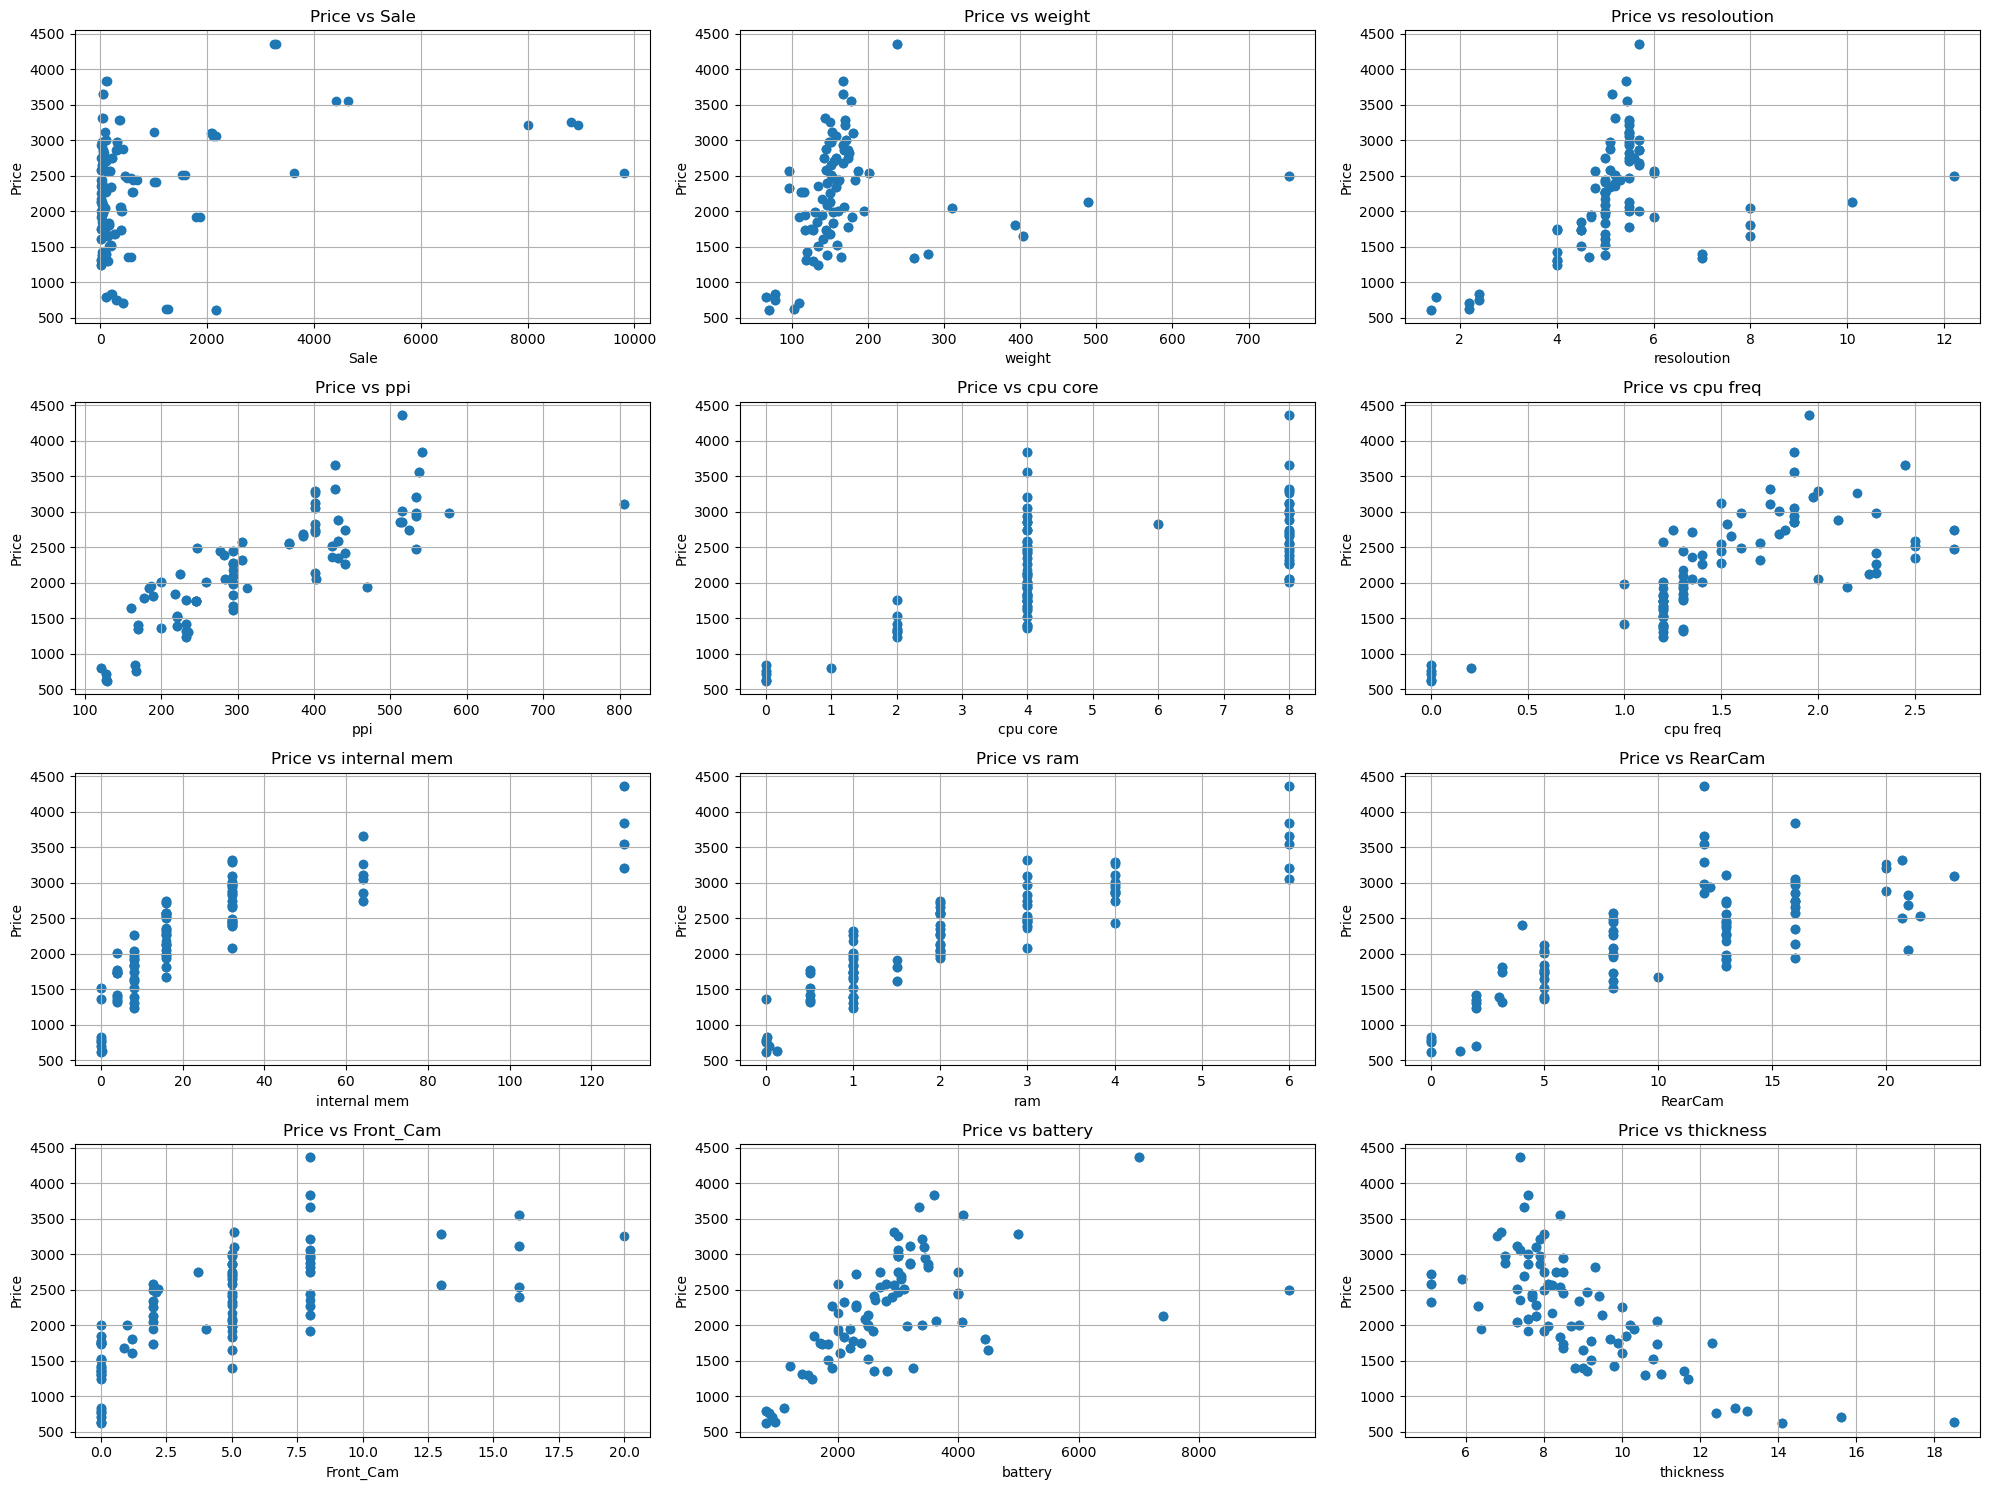

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15)) # Mengatur ukuran gambar
features = ['Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']

# Loop melalui setiap fitur dan menggambar plot
for i in range(len(features)):
    plt.subplot(4, 3, i+1)
    plt.scatter(df[features[i]], df['Price'])
    plt.title('Price vs ' + features[i]) 
    plt.xlabel(features[i]) 
    plt.ylabel('Price') 
    plt.grid(True)
    
plt.tight_layout() 
plt.show()

1. **Sale vs Price**: Plot ini menunjukkan bagaimana harga suatu produk bervariasi sehubungan dengan status penjualannya. Tampaknya tidak ada hubungan linier yang jelas antara status penjualan dan harga, karena titik-titiknya tersebar di seluruh plot.

2. **Weight vs Price**: Plot ini menggambarkan hubungan antara berat produk dan harganya. Tampaknya ada sedikit tren di mana produk yang lebih berat cenderung memiliki harga yang lebih tinggi, namun ada juga pengecualian.

3. **Resolution vs Price**: Plot ini mengkaji bagaimana resolusi produk mempengaruhi harganya. Tampaknya produk dengan resolusi lebih tinggi cenderung memiliki harga lebih tinggi, meskipun ada juga produk dengan harga lebih rendah dengan resolusi tinggi.

4. **PPI (Pixels Per Inch) vs Price**: Plot ini menunjukkan korelasi antara kerapatan piksel (PPI) produk dan harganya. Tampaknya terdapat hubungan positif, yang menunjukkan bahwa produk dengan kepadatan piksel lebih tinggi cenderung memiliki harga lebih tinggi.

5. **CPU Core vs Price**: Plot ini mengeksplorasi bagaimana jumlah inti CPU mempengaruhi harga produk. Tampaknya tidak ada korelasi yang kuat antara inti CPU dan harga.

6. **CPU Frequency vs Price**: Plot ini menggambarkan hubungan antara frekuensi CPU dan harga produk. Tampaknya produk dengan frekuensi CPU yang lebih tinggi cenderung memiliki harga yang lebih tinggi.

7. **Internal Memory vs Price**: Plot ini mengkaji bagaimana kapasitas memori internal produk mempengaruhi harganya. Tampaknya terdapat korelasi positif yang menunjukkan bahwa produk dengan kapasitas memori internal yang lebih besar cenderung memiliki harga yang lebih tinggi.

8. **RAM vs Price**: Plot ini menggambarkan hubungan antara kapasitas RAM dan harga produk. Hal ini menunjukkan bahwa produk dengan kapasitas RAM yang lebih tinggi cenderung memiliki harga yang lebih tinggi.

9. **Rear Camera vs Price**: Plot ini mengeksplorasi bagaimana spesifikasi kamera belakang mempengaruhi harga produk. Tampaknya ada sedikit korelasi positif antara spesifikasi kamera belakang dan harga.

10. **Front Camera vs Price**: Plot ini menunjukkan hubungan antara spesifikasi kamera depan dan harga produk. Mirip dengan kamera belakang, sepertinya ada sedikit korelasi positif.

11. **Battery vs Price**: Plot ini mengkaji bagaimana kapasitas baterai mempengaruhi harga produk. Tampaknya produk dengan kapasitas baterai lebih tinggi cenderung memiliki harga lebih tinggi.

12. **Thickness vs Price**: Plot ini menggambarkan hubungan antara ketebalan produk dan harganya. Tampaknya tidak ada korelasi yang kuat antara ketebalan dan harga.

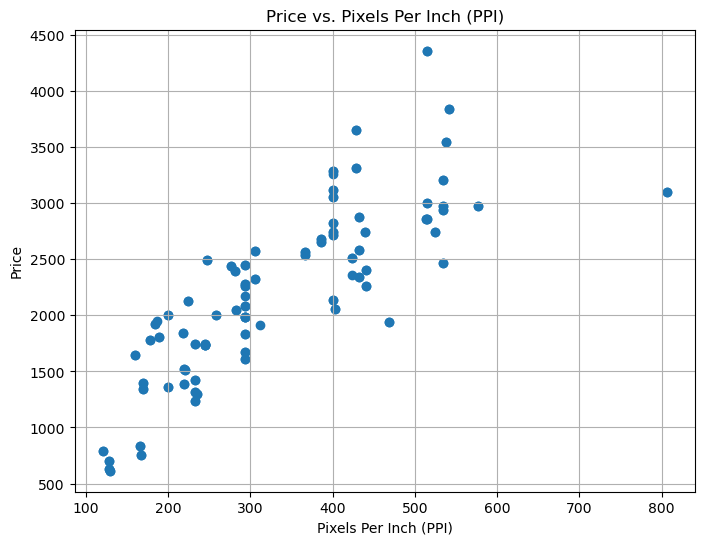

In [87]:
# Plotting the relationship between house price and Pixels Per Inch (PPI)
plt.figure(figsize=(8,6))
plt.scatter(df['ppi'], df['Price'])
plt.xlabel('Pixels Per Inch (PPI)')
plt.ylabel('Price')
plt.title('Price vs. Pixels Per Inch (PPI)')
plt.grid(True)
plt.show()

## Split dataset dan normalisasi data

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialise the Scaler 
scaler = StandardScaler() 

# Tentukan variabel independen dan dependen
X = df.drop('Price', axis=1)
y = df['Price']

# Scaling the data independent variable
x_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1,1)).flatten()

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

In [89]:
from sklearn import metrics

# Fungsi untuk menampilkan hasil evaluasi model
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    

## Membangun Model 

In [90]:
from sklearn.svm import SVR

# Instantiate SVR with polynomial kernel
svr_poly = SVR(kernel='poly', C=10, gamma=0.1,coef0=1,epsilon=0.2, degree=3)
svr_poly_trial = SVR(kernel='poly', C=10, degree=3)

# Train SVR model
svr_poly.fit(X_train, y_train)
svr_poly_trial.fit(X_train, y_train)

# Predict using the trained model
y_pred = svr_poly.predict(X_test)
y_pred_trial = svr_poly_trial.predict(X_test)

# Evaluate the model
print_evaluate(y_test, y_pred) 

print('Trial Model tanpa paramater apa pun :')
print_evaluate(y_test, y_pred_trial)


MAE: 0.14619530304303108
MSE: 0.028890679936465304
RMSE: 0.16997258583802655
R2 Square 0.9701126151058895
__________________________________
Trial Model tanpa paramater apa pun :
MAE: 0.1956883073815035
MSE: 0.05589236605647588
RMSE: 0.23641566372911055
R2 Square 0.9421793927783624
__________________________________


Model prediksi SVR dengan kernel polinomial derajat 3 memberikan hasil prediksi yang baik dengan skor evaluasi sebagai berikut:
- Mean Absolute Error (MAE): 0.146
- Mean Squared Error (MSE): 0.029
- Root Mean Squared Error (RMSE): 0.170
- Coefficient of Determination (R-squared): 0.970

Penggunaan parameter `coef0` dengan nilai 1 dipilih karena mampu meningkatkan kualitas prediksi, terutama dalam hal peningkatan nilai R-squared dari 0.94 menjadi 0.97.

## Visualisasi Model 

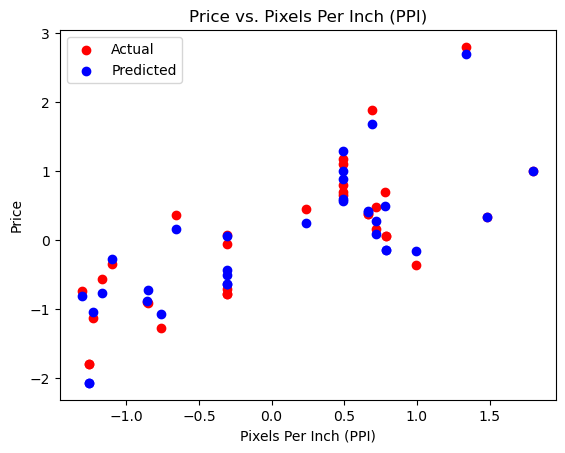

In [91]:
# Scatter plot of test data dan predicted data
plt.scatter(X_test[:,3], y_test, color='red', label='Actual')
plt.scatter(X_test[:,3], y_pred, color='blue', label='Predicted')
plt.title('Price vs. Pixels Per Inch (PPI)')
plt.xlabel('Pixels Per Inch (PPI)')
plt.ylabel('Price')
plt.legend()
plt.show()


Polynomial equation:
         3          2
0.01237 x - 0.1643 x + 0.8392 x + 0.06513


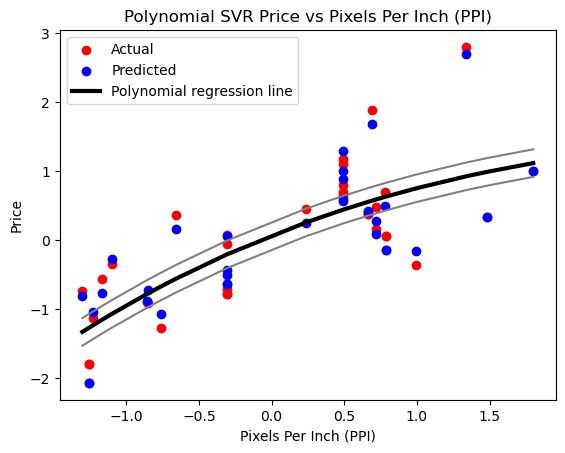

In [92]:
# Sort the test data and predicted data
sorted_indices = np.argsort(X_test[:,3], axis=0)
X_test_sorted = X_test[:,3][sorted_indices].reshape(-1,1)
y_pred_sorted = y_pred[sorted_indices]

# Fit a polynomial curve
coefficients = np.polyfit(X_test_sorted.flatten(), y_pred_sorted, 3)
polynomial = np.poly1d(coefficients)

# Print the polynomial equation
print("Polynomial equation:")
print(polynomial)

# Plot data points
plt.scatter(X_test[:,3], y_test, color='red', label='Actual')
plt.scatter(X_test[:,3], y_pred, color='blue', label='Predicted')

# Plot polynomial curve
plt.plot(X_test_sorted, polynomial(X_test_sorted), color='black', label='Polynomial regression line', linewidth=3)
plt.plot(X_test_sorted, polynomial(X_test_sorted)-0.2, color='gray', )
plt.plot(X_test_sorted, polynomial(X_test_sorted)+0.2, color='gray')
plt.title('Polynomial SVR Price vs Pixels Per Inch (PPI)') 
plt.xlabel('Pixels Per Inch (PPI)')
plt.ylabel('Price')
plt.legend()
plt.show()

### mencoba hyperparameter tuning

In [93]:
# buat hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1 ,10], 
              'gamma': [0.001,0.1, 1], 
              'coef0': [0.1,0.9, 1],
              'epsilon': [0.1,0.2],
              }

poly_svr = SVR(kernel='poly', degree=3)
grid_search = GridSearchCV(poly_svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# best hyperparameters
grid_search.best_params_

# best model
best_poly_svr = grid_search.best_estimator_

# Predict using the best model
y_pred = best_poly_svr.predict(X_test)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END .........C=0.1, coef0=0.1, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END .........C=0.1, coef0=0.1, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END .........C=0.1, coef0=0.1, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END .........C=0.1, coef0=0.1, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END .........C=0.1, coef0=0.1, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END ...........C=0.1, coef0=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ...........C=0.1, coef0=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ...........C=0.1, coef0=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ...........C=0.1, coef0=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ...........C=0.1, coef0=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END .............C=0.1, coef0=0.1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END .............C=0.1, coef0=0.1, epsilon

[CV] END .............C=0.1, coef0=1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END .............C=0.1, coef0=1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ...............C=0.1, coef0=1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ...............C=0.1, coef0=1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ...............C=0.1, coef0=1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ...............C=0.1, coef0=1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ...............C=0.1, coef0=1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ...........C=0.1, coef0=1, epsilon=0.2, gamma=0.001; total time=   0.0s
[CV] END ...........C=0.1, coef0=1, epsilon=0.2, gamma=0.001; total time=   0.0s
[CV] END ...........C=0.1, coef0=1, epsilon=0.2, gamma=0.001; total time=   0.0s
[CV] END ...........C=0.1, coef0=1, epsilon=0.2, gamma=0.001; total time=   0.0s
[CV] END ...........C=0.1, coef0=1, epsilon=0.2, gamma=0.001; total time=   0.0s
[CV] END .............C=0.1,

In [94]:
# print the best parameter of gridsearch
print_evaluate(y_test, y_pred)
print(grid_search.best_params_)

MAE: 0.16035978878767815
MSE: 0.03978286601467458
RMSE: 0.19945642635592012
R2 Square 0.9588446574678686
__________________________________
{'C': 0.1, 'coef0': 1, 'epsilon': 0.1, 'gamma': 0.1}


Polynomial equation:
         3          2
0.08189 x - 0.1736 x + 0.7218 x + 0.08118


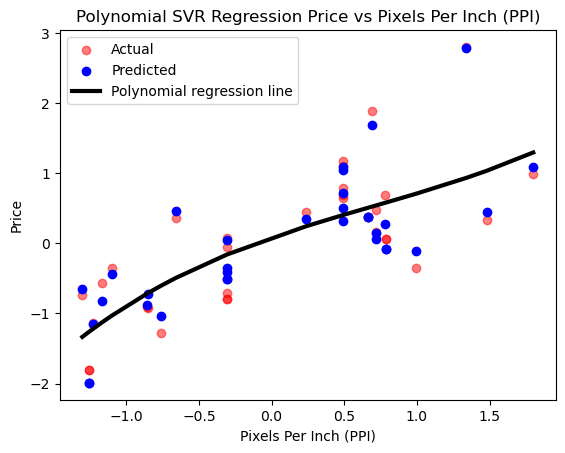

In [95]:
# Sort the test data and predicted data
sorted_indices = np.argsort(X_test[:,3], axis=0)
X_test_sorted = X_test[:,3][sorted_indices].reshape(-1,1)
y_pred_sorted = y_pred[sorted_indices]

# Fit a polynomial curve
coefficients = np.polyfit(X_test_sorted.flatten(), y_pred_sorted, 3)
polynomial = np.poly1d(coefficients)

# Print the polynomial equation
print("Polynomial equation:")
print(polynomial)

# Plot data points
plt.scatter(X_test[:,3], y_test, alpha=0.5, color='red', label='Actual')
plt.scatter(X_test[:,3], y_pred, color='blue', label='Predicted')

# Plot polynomial curve
plt.plot(X_test_sorted, polynomial(X_test_sorted), color='black', label='Polynomial regression line', linewidth=3)
plt.title('Polynomial SVR Regression Price vs Pixels Per Inch (PPI)') 
plt.xlabel('Pixels Per Inch (PPI)')
plt.ylabel('Price')
plt.legend()
plt.show()
